# Plot gamma distribution of priors

In [12]:
%pylab inline
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


Shape 0.2238 scale 0.0459
Mean
0.010269275914169288
Median
0.0014280674537628054
Shape 0.2750 scale 0.0221
Mean
0.006084038316187462
Median
0.0013151219002321415
Shape 0.2516 scale 0.0305
Mean
0.007676536517570465
Median
0.001380309572242056
Shape 0.2193 scale 0.0647
Mean
0.014199833789112567
Median
0.0020529606802498802
Shape 0.2934 scale 0.0158
Mean
0.004649112395172601
Median
0.0011053629926517975
Shape 0.1227 scale 0.1765
Mean
0.021663419573089395
Median
0.0003834818146472772
Shape 0.1493 scale 0.1365
Mean
0.020374599076083324
Median
0.0008210720835374074
Shape 0.0488 scale 38.9949
Mean
1.901997244721266
Median
1.9337277064061165e-05
Shape 0.3314 scale 0.0175
Mean
0.005803010520963905
Median
0.0016415690003885252
Shape 0.1303 scale 0.1652
Mean
0.021529622374444436
Median
0.0005736589469346041
Shape 0.2045 scale 0.0387
Mean
0.007919790455484785
Median
0.0009299402806245271


/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/storage/BonnieH/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Shape 0.1467 scale 0.1732
Mean
0.02541042040414933
Median
0.0009577446720825368
Shape 0.2601 scale 0.0273
Mean
0.00709026991220758
Median
0.0013453914311203983
Shape 0.1639 scale 0.1199
Mean
0.019659994968111685
Median
0.001140943113076504
Shape 0.2622 scale 0.0284
Mean
0.00743631916989155
Median
0.0013769201847978682
Shape 0.4635 scale 0.0072
Mean
0.0033468120268164638
Median
0.001389382334883046
Shape 0.4352 scale 0.0117
Mean
0.0050872194945688134
Median
0.0021054809185577753
Shape 0.1898 scale 0.0577
Mean
0.010946190860163973
Median
0.0010186078494676186
Shape 0.2361 scale 0.0456
Mean
0.010763898103293083
Median
0.0016340876579345955
Shape 0.4037 scale 0.0182
Mean
0.0073564488528669895
Median
0.0027339154194985006
Shape 0.2403 scale 0.0371
Mean
0.00892466184468336
Median
0.0014473562410951477
Shape 0.1200 scale 0.2312
Mean
0.027745111538439556
Median
0.00045239160702135474
Shape 0.2291 scale 0.0285
Mean
0.006523865993677356
Median
0.0008987048522826565
Shape 0.2496 scale 0.0277
Mean

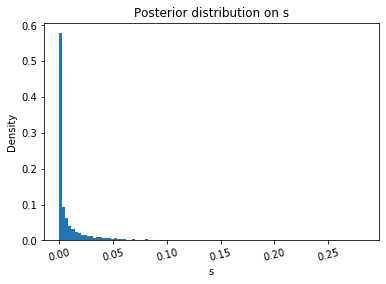

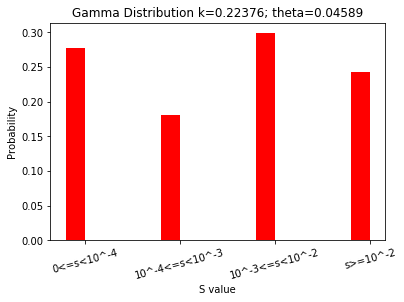

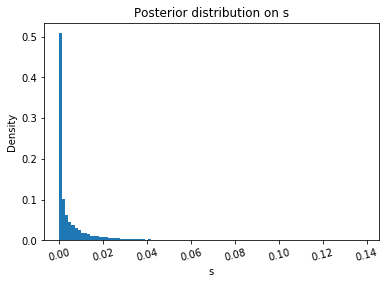

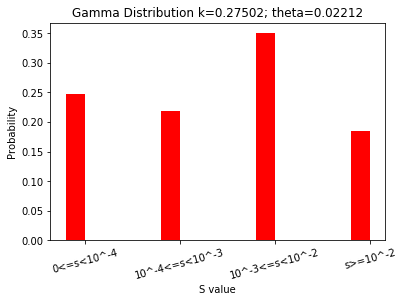

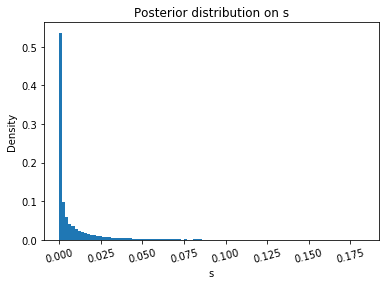

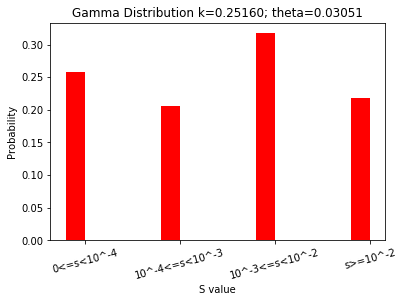

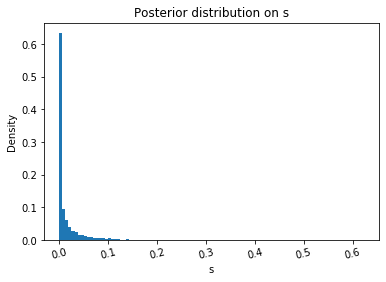

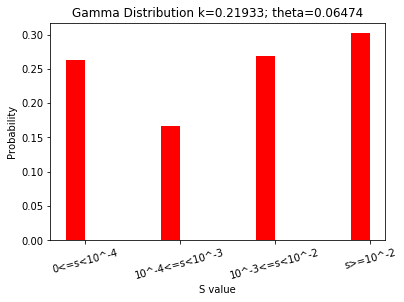

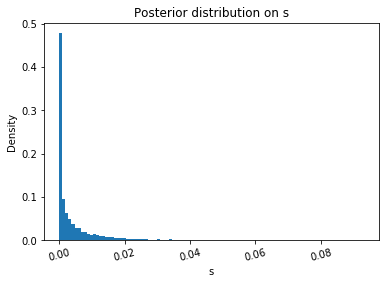

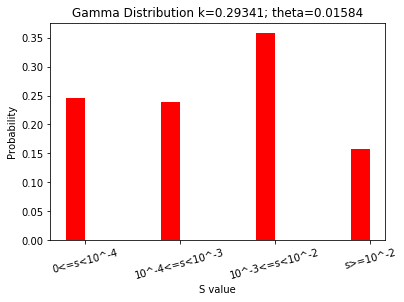

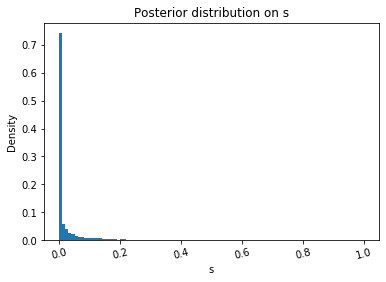

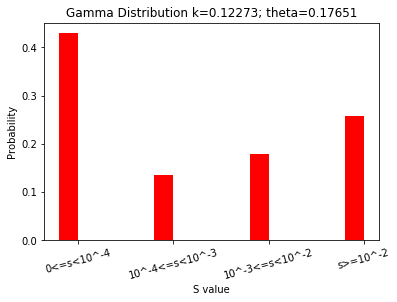

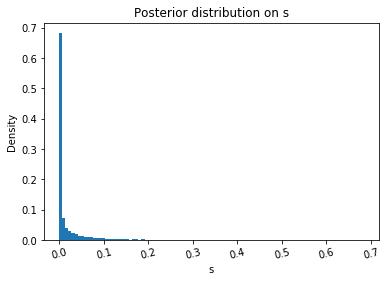

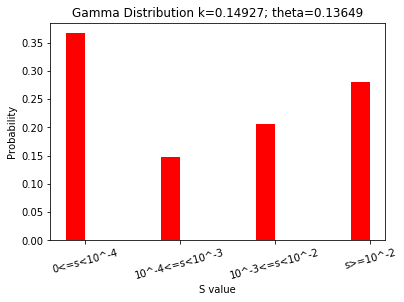

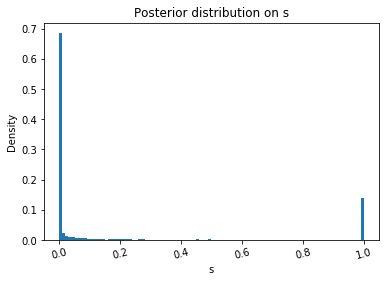

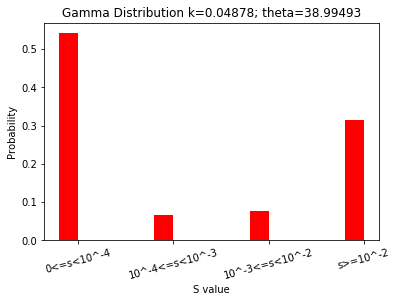

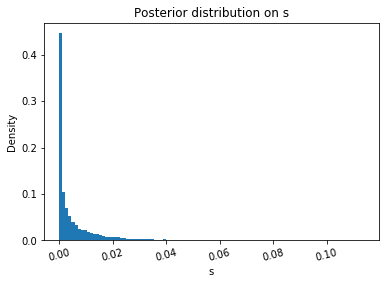

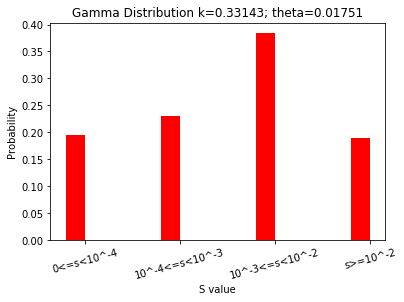

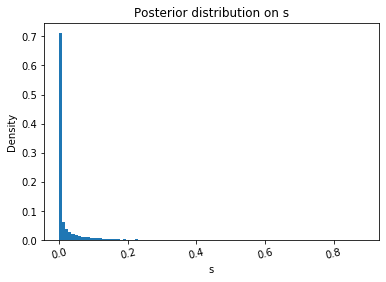

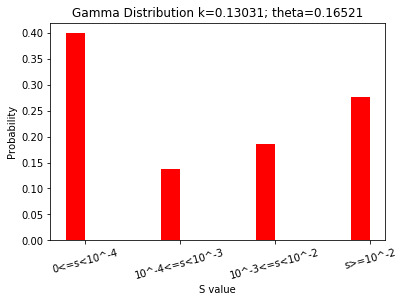

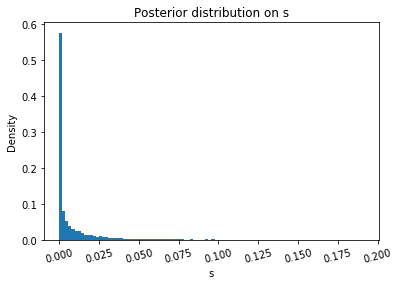

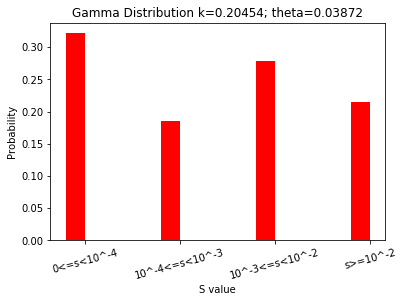

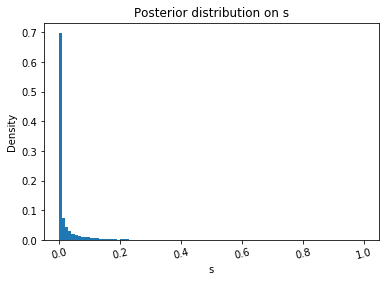

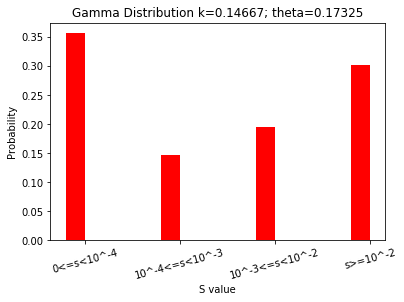

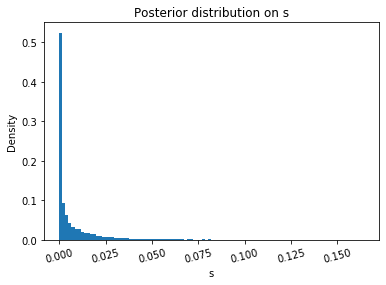

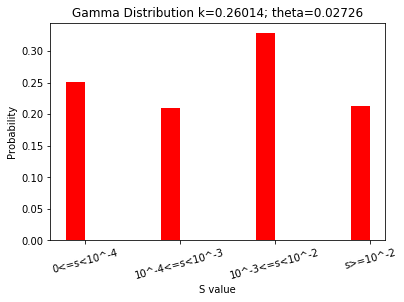

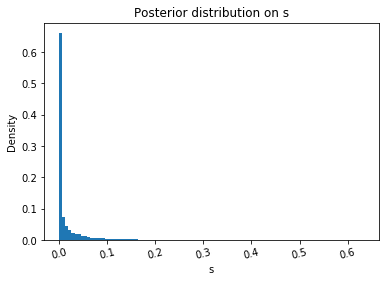

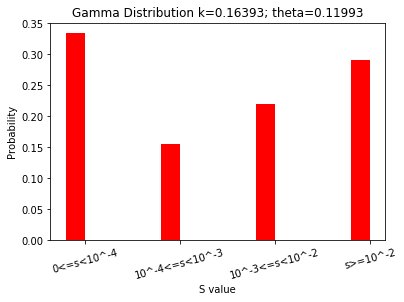

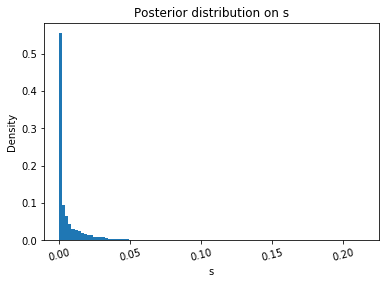

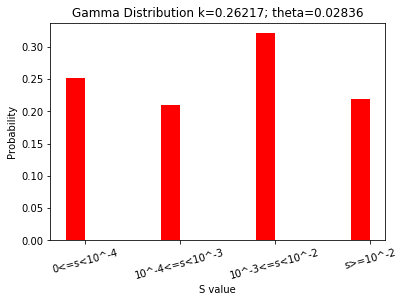

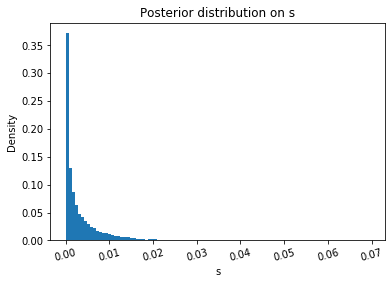

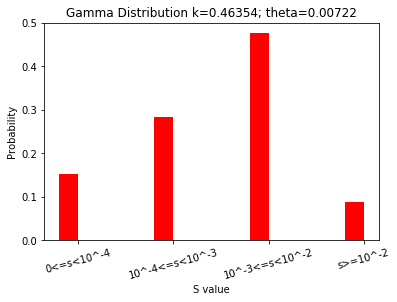

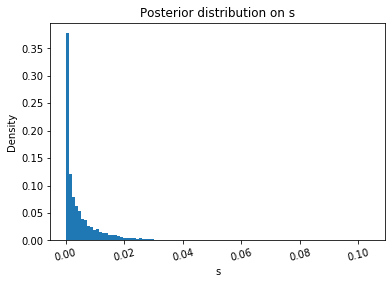

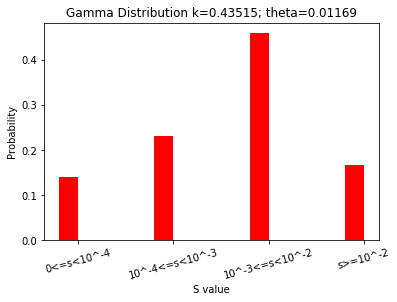

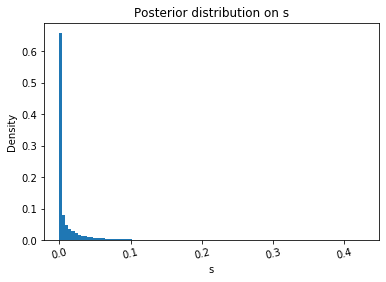

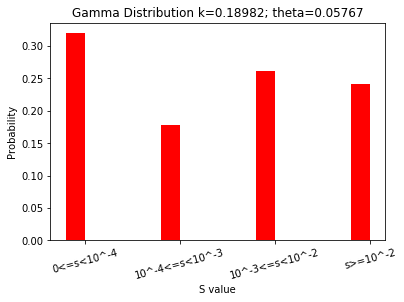

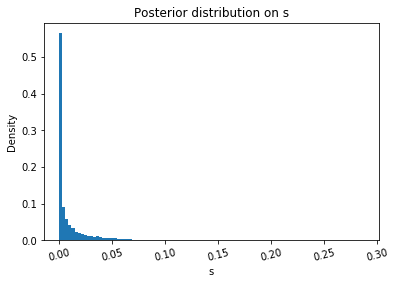

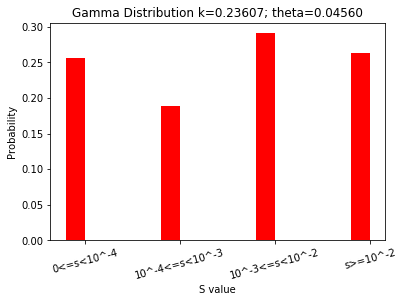

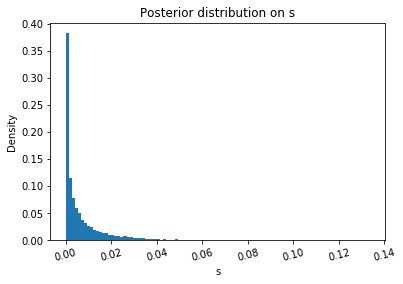

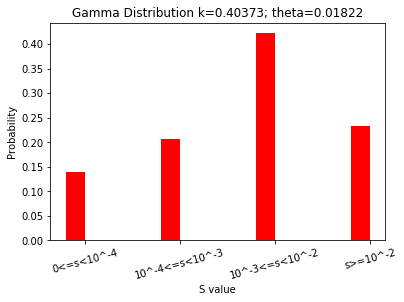

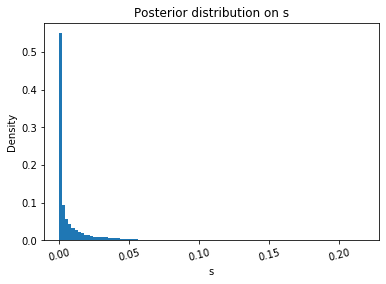

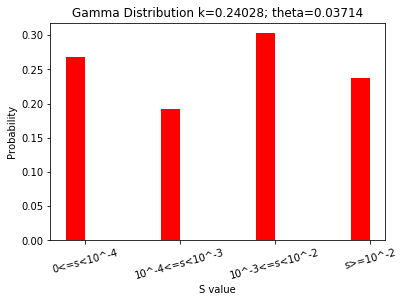

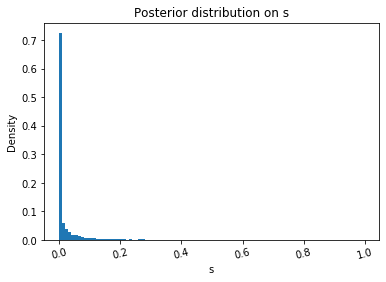

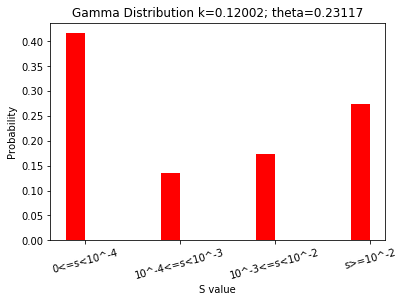

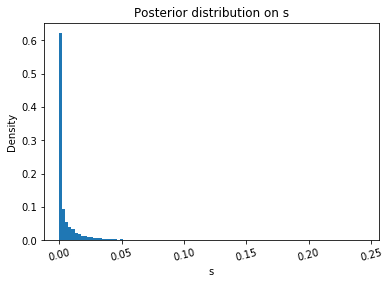

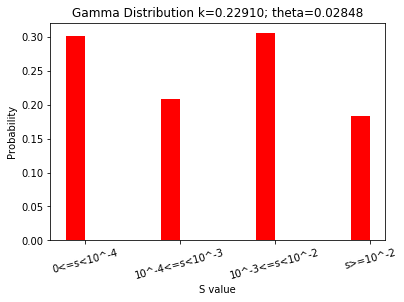

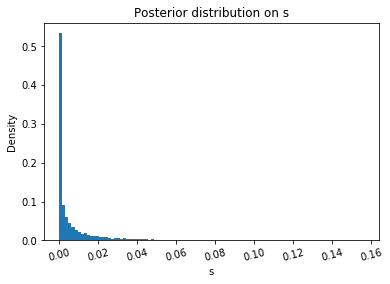

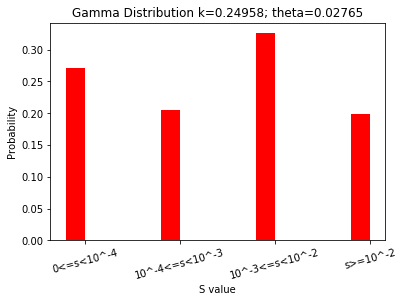

In [13]:
# shape_scale_combos = [(0.187, 0.0356),(0.0881,0.2541),(0.13,0.5)]
#shape_scale_combos = [(0.2,10**-2/0.2),(0.3,10**-2/0.3),(0.6,10**-2/0.6)]
#shape_scale_combos = [(0.048775495152815984, 38.99493462367151)]
shape_scale_combos = [(0.010269275914169288, 0.2237565580911468, 0.04589486002902368), (0.006084038316187462, 0.2750226676598183, 0.02212195223018106), (0.007676536517570465, 0.2516033432553967, 0.030510471038447975), (0.014199833789112567, 0.21932955168810497, 0.06474199978899914), (0.004649112395172601, 0.2934143021495712, 0.015844873140514686), (0.021663419573089395, 0.12272871476170233, 0.17651467804541449), (0.020374599076083324, 0.14927122006522386, 0.13649382022321965), (1.901997244721266, 0.048775495152815984, 38.99493462367151), (0.005803010520963905, 0.33143041640136606, 0.017508986000658408), (0.021529622374444436, 0.13031318358244848, 0.16521446090542907), (0.007919790455484785, 0.20453924549506663, 0.038720150924169736), (0.02541042040414933, 0.14667124589542568, 0.17324745725734522), (0.00709026991220758, 0.260136685282057, 0.027255940101335), (0.019659994968111685, 0.1639299739270127, 0.11992922646876644), (0.00743631916989155, 0.2621707412322616, 0.028364412958285023), (0.0033468120268164638, 0.46353655584983233, 0.007220168473402343), (0.0050872194945688134, 0.4351504034083129, 0.01169071533594637), (0.010946190860163973, 0.18981984208475344, 0.05766620991748883), (0.010763898103293083, 0.2360697754163238, 0.04559625680293158), (0.0073564488528669895, 0.4037303746932266, 0.01822119244423154), (0.00892466184468336, 0.2402797676101085, 0.037142793725208775), (0.027745111538439556, 0.12002206194528398, 0.23116676291637184), (0.006523865993677356, 0.2291000202337541, 0.028476060312089716), (0.006901981804585129, 0.2495821546679936, 0.027654147844690592)]
fig_num = 0
for combo in shape_scale_combos:
    
    shape = combo[1]
    scale = combo[2] 
    print('Shape %.4f scale %.4f'%(shape, scale))
    print('Mean')
    print(shape*scale)

    beta = 1/scale
    num_sims = 10000

    s = [] # List of s values drawn from gamma distribution
    for i in range(0, num_sims):
        s_val = np.random.gamma(shape, scale)
        if s_val > 1:
            s_val = 1
        s.append(s_val)

    # List of binned s values
    # Bins: 0<=s<10^-4, 10^-4<=s<10^-3, 10^-3<=s<10^-2, s>=10^-2
    svals = [0, 0, 0, 0] 
    for elem in s:
        if elem < 10**-4:
            svals[0] += 1
        elif elem < 10**-3:
            svals[1] += 1
        elif elem < 10**-2:
            svals[2] += 1
        elif elem >= 10**-2:
            svals[3] += 1

    #print("percent s < 10^-4")
    #print(svals[0]/num_sims*100)
    #print("percent 10^-4 <= s < 10^-3")
    #print(svals[1]/num_sims*100)
    #print("percent 10^-3 <= s < 10^-2")
    #print(svals[2]/num_sims*100)
    #print("percent s >= 0.01")
    #print(svals[3]/num_sims*100)

    print('Median')
    print(np.median(s))

    # Plot pdf of gamma distribution
    fig_num = fig_num + 1
    plt.figure(fig_num)
    plt.hist(s, bins = 100, weights=np.ones(len(s)) / len(s)) 
    plt.xlabel("s")
    plt.ylabel("Density")
    plt.title("Posterior distribution on s")
    plt.savefig("/storage/BonnieH/selection_project/figures/figures/gamma_distribution/gamma_distribution_pdf_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')
    plt.xticks(rotation=15) 

    # Plot discrete pdf of gamma distribution
    fig_num = fig_num + 1
    plt.figure(fig_num)
    x = ['0<=s<10^-4', '10^-4<=s<10^-3', '10^-3<=s<10^-2', 's>=10^-2']
    y_pos = np.arange(len(x))
    barWidth = 0.2
    r1 = np.arange(len(x))

    # Normalize s values
    total = sum(svals)
    for i in range(0, len(svals)):
        svals[i] = svals[i]/total

    plt.bar(r1, svals, color='red', width=barWidth) 
    plt.xticks([r + barWidth/2 for r in range(len(x))], x)
    plt.xticks(rotation=15) 
    plt.xlabel("S value")
    plt.ylabel("Probability")
    plt.title("Gamma Distribution k=%.5f; theta=%.5f"%(shape, scale)) 
    plt.savefig("/storage/BonnieH/selection_project/figures/figures/gamma_distribution/gamma_distribution_pdf_discrete_k_%.4f_theta_%.4f.pdf"%(shape,scale),bbox_inches='tight')